# Звіт

Лабораторна робота №2

Виконали: Радомир Гусєв, Анна Монастирська

## Розподіл роботи:
- Алгоритм Гаффмана - Анна Монастирська,
- Алгоритм LZ77 - Радомир Гусєв,
- Алгоритм LZW - Радомир Гусєв,
- Графіки, аналіз результатів, звіт - Анна Монастирська

## Хід роботи

Huffman algorithm

In [81]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
class Node:
    """class for a node"""
    def __init__(self, symbol, prob, left=None, right=None) -> None:
        """
        store info about a node:
        symbol, probability, left and right children, code
        """
        self.symbol = symbol
        self.prob = prob
        self.code = ''
        self.left = left
        self.right = right

def assign_code(Node, parent_code='', dct = {}) -> dict:
    """
    assign new code to a node
    """
    new_code = parent_code + str(Node.code)
    if Node.left:
        assign_code(Node.left, new_code)
    if Node.right:
        assign_code(Node.right, new_code)
    if (not Node.left and not Node.right):
        Node.code = new_code
        dct[Node.symbol] = Node.code
    return dct


def find_probabilities(message) -> None:
    """find frequency of symbols"""
    dct = {}
    # print('message=', message)
    for i in message:
        try:
            dct[i] += 1
        except KeyError:
            dct[i] = 1
    for key, value in dct.items():
        dct[key] = value / len(message)
    print('probabilities=', dct)
    return dct

class Huffman:
    def __init__(self, file_name: str) -> None:
        """
        stores some variables for huffman algo to use
        """
        self.file_name = file_name
        self.message = ''
        self.dct_prob = None
        self.dct_codes = {}
        self.encoded_message = ''
        self.tree = None

    def get_message(self) -> None:
        """
        read file and assign message into inint
        """
        with open(self.file_name, mode='r') as file:
            message = file.readlines()
            message = ''.join(i for i in message)
            self.message = message


    def encode(self) -> str:
        """encode using huffman method"""
        # find probabilities for each symbol
        self.dct_prob = find_probabilities(self.message)
        nodes = []
        # turn all symbols into a node object
        # add them to a nodes list
        for key, value in self.dct_prob.items():
            nodes.append(Node(key, value))

        # continue untill only one node remains
        while len(nodes) > 1:
            nodes = sorted(nodes, key=lambda x: x.prob)
        # pick two nodes with the lowest probability
            right = nodes[0]
            left = nodes[1]
        # assign code (0 if bigger probability, else - 1)
            right.code = '1'
            left.code = '0'
        # make a combined node
            nodes.append(Node(symbol=right.symbol+left.symbol, prob=right.prob+left.prob, left=left, right=right))
        # remove unneeded nodes
            nodes.remove(right)
            nodes.remove(left)
        # assign each node a code, working from the parent node
        self.dct_codes = assign_code(nodes[0])
        print('codes=', self.dct_codes)
        # encode a message using nodes codes
        encoded_message = ''
        for i in self.message:
            encoded_message += self.dct_codes[i]
        print('encoded message=', encoded_message)
        self.encoded_message = encoded_message
        self.tree = nodes[0]


    def decode(self) -> str:
        """decode a message using huffman tree created by nodes"""
        res = ''
        tree = self.tree
        child_tree = self.tree
        for i in self.encoded_message:
            if i == '0':
                child_tree = child_tree.left
            if i == '1':
                child_tree = child_tree.right
            try:
                if child_tree.left.symbol is None and child_tree.right.symbol is None:
                    pass
            except AttributeError:
                res += child_tree.symbol
                child_tree = tree
        print('decoded message == message:', res == self.message)
        compare_size(self.message, self.dct_codes)
        return res

def compare_size(message, dct_codes):
    inicial= len(message)*8
    final = 0
    dct = {}
    for i in message:
        try:
            dct[i] += 1
        except KeyError:
            dct[i] = 1
    for key, value in dct.items():
        final += value*len(dct_codes[key])

    res = 100 - (final/inicial * 100)
    print('inicial size=', inicial)
    print('final size=', final)
    print('compression_effectivness', res, '%')
    return res


Графік часу для різних вхідних даних

100%|██████████| 1/1 [00:00<00:00, 874.91it/s]


probabilities= {'a': 0.5, 'c': 0.2, 'b': 0.3}
codes= {'b': '00', 'c': '01', 'a': '1'}
encoded message= 101100101100100
decoded message == message: True
inicial size= 80
final size= 15
compression_effectivness 81.25 %


100%|██████████| 1/1 [00:00<00:00, 20.32it/s]


probabilities= {'a': 0.008016032064128256, 'e': 0.02404809619238477, 'j': 0.02404809619238477, 'g': 0.01002004008016032, 'h': 0.01603206412825651, ';': 0.03206412825651302, 'k': 0.014028056112224449, 'n': 0.01603206412825651, 'v': 0.008016032064128256, 'q': 0.022044088176352707, 'u': 0.026052104208416832, 'r': 0.01603206412825651, 't': 0.02004008016032064, 'y': 0.014028056112224449, '4': 0.018036072144288578, '1': 0.006012024048096192, '2': 0.01603206412825651, 'w': 0.014028056112224449, 'f': 0.008016032064128256, 'c': 0.006012024048096192, 's': 0.008016032064128256, 'd': 0.012024048096192385, 'b': 0.01002004008016032, 'l': 0.008016032064128256, 'W': 0.022044088176352707, 'I': 0.014028056112224449, 'Q': 0.028056112224448898, 'U': 0.008016032064128256, 'H': 0.02004008016032064, 'E': 0.02004008016032064, 'F': 0.03406813627254509, 'P': 0.01002004008016032, 'D': 0.022044088176352707, '7': 0.014028056112224449, '3': 0.012024048096192385, 'Y': 0.01002004008016032, '5': 0.01603206412825651, '

  0%|          | 0/1 [00:00<?, ?it/s]

probabilities= {'Ч': 0.00118859550139171, 'о': 0.07972316256676447, 'р': 0.03216730610095539, 'н': 0.036924697209057396, 'а': 0.0700097795832393, ' ': 0.16844955991875424, 'д': 0.025784999623862184, '\n': 0.00553674866471075, 'П': 0.0019799894681411267, 'т': 0.038146392838335964, 'е': 0.039632889490709394, 'л': 0.024102911306702775, 'й': 0.011551944632513352, 'м': 0.022682614910103063, 'К': 0.0013089596027984654, 'у': 0.02719325961032122, 'і': 0.033521402241781385, 'ш': 0.006668171217934251, 'в': 0.03778830963665087, 'с': 0.031514330850823745, '1': 6.0182050703377715e-06, '6': 9.027307605506657e-06, '3': 9.027307605506657e-06, 'к': 0.03124351162265854, 'є': 0.0036259685548785075, 'п': 0.01944782968479651, 'ж': 0.011458662453923118, 'х': 0.008383359662980516, ',': 0.022685624012638232, 'и': 0.04664108929511773, 'б': 0.01626119010005266, 'я': 0.014239073196419169, 'з': 0.017431730986233355, 'ь': 0.01766343188144136, 'Б': 0.0009508764011133679, 'г': 0.013631234484315052, '.': 0.0101135936

100%|██████████| 1/1 [00:00<00:00,  3.00it/s]

decoded message == message: True
inicial size= 2658600
final size= 1613635
compression_effectivness 39.305085383284435 %


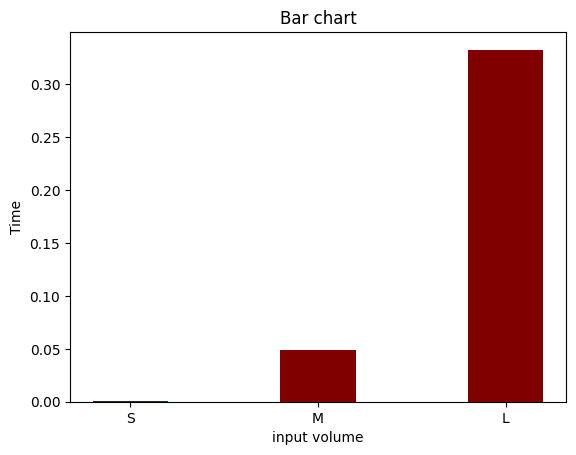

In [82]:
from tqdm import tqdm
import matplotlib.pyplot as plt
import time
def find_time(file_name):
    """find the time of algorithm"""
    NUM_OF_ITERATIONS = 1
    time_taken = 0
    for i in tqdm(range(NUM_OF_ITERATIONS)):
        huf = Huffman(file_name)
        start = time.time()
        huf.get_message()
        huf.encode()
        huf.decode()
        end = time.time()
        time_taken += end - start
    return time_taken / NUM_OF_ITERATIONS


def graph_plotting():
    """"""
    # x-coordinates of left sides of bars
    names = ['S', 'M', 'L']
    # heights of bars
    func1 = find_time('to_encode.txt')
    func2 = find_time('non_diferent.txt')
    func3 = find_time('ChornaRada.txt')
    height = [func1, func2, func3]
    plt.bar(names, height, color ='maroon', width = 0.4)
    plt.xlabel('input volume')
    plt.ylabel('Time')
    plt.title('Bar chart')
    plt.show()
graph_plotting()

S - 10 символів
M - 50 000 символів
L - 330 000 символів

Гаффмана (до порівняння 10 символів проти 50 000 символів проти твору ‘Чорна Рада’ - 332 325)
Як бачимо кількість символів приблизно пропорційно збільшила час виконання алгоритму, порівнюючи з повідомленням у 50 000  символів. Швидкість виконання повʼязана з рівноманіттям символів у творі та загальною кількістю символів.
Ступені стиснення відображаються з виконанням коду разом з іншою корисною інформацією.
Для S = 81.25%
M = 25.65 %
L = 39.3 %
Отже ефективність для малих файлів найкраща.

LZ77

In [73]:
"""LZ77 Algorithm Implementation."""
from itertools import cycle, islice


class LZ77:
    """LZ77 Algorithm Implementation.
    Either raw text or compressed data can be used to initialize the class.
    compress() will use the raw data to compress it.
    decompress() will use the compressed data to decompress it.
    Attributes:
        buffer_size (int): Size of the buffer, defaults to 256
        lookahead_size (int): How far ahead to look for matches, defaults to 256
        _buffer (bytes): Buffer, used between methods
        compressed_data (bytes): Compressed data
        raw_data (str): Raw data
        _raw_data_bytes (bytes): Raw data in bytes
    Methods:
        compress(): Compresses a string using the LZ77 algorithm.
        _find_match(): Finds the longest match in the buffer, used by compress().
        set_compressed(): Sets the compressed data.
        compress_and_set(): Compresses the data and saves it to a variable.
        decompress(): Decompresses the data.
        set_raw(): Sets the raw data.
        decompress_and_set(): Decompresses the data and saves it to a variable.
        save_compressed(): Saves the compressed data to a file.
        save_raw(): Saves the raw data to a file.
    """

    def __init__(
        self,
        compressed_data: bytes = b"",
        raw_data: str = "",
        buffer_size: int = 256,
        lookahead_size: int = 256,
    ) -> None:
        self.buffer_size = buffer_size
        self.lookahead_size = lookahead_size
        self._buffer: bytes = b""
        self.compressed_data: bytes = compressed_data
        self._raw_data_bytes: bytes = raw_data.encode("utf-8")
        self.raw_data: str = raw_data

    def compress(self) -> list[tuple[int, int, int]]:
        """Compresses a string using the LZ77 algorithm.
        Returns:
            list[tuple[int, int, int]]: Compressed data. Format:
            [(offset, length, char), ...]
        """
        compressed = []
        i = 0
        while i < len(self._raw_data_bytes):
            offset, length, char = self._find_match(i)
            compressed.append((offset, length, char))
            self._buffer += self._raw_data_bytes[i : i + length + 1]
            i += length + 1
            if len(self._buffer) > self.buffer_size:
                self._buffer = self._buffer[-self.buffer_size :]

        self._buffer = b""
        return compressed

    def _find_match(self, position: int) -> tuple[int, int, int]:
        """Finds the longest match in the buffer.
        Args:
            position (int): Current position in the data
        Returns:
            tuple[int, int, int]: Tuple containing the length of the match,
            the offset of the match and the character after the match in bytes
        """
        possible_matches = []
        for i in range(len(self._buffer)):
            if self._buffer[i] == self._raw_data_bytes[position]:
                length = 0
                for length in range(self.lookahead_size):
                    if position + length >= len(self._raw_data_bytes):
                        break
                    if (
                        self._buffer[i + length % (len(self._buffer) - i)]
                        != self._raw_data_bytes[position + length]
                    ):
                        break
                possible_matches.append((len(self._buffer) - i - 1, length))

        if not possible_matches:
            return (0, 0, self._raw_data_bytes[position])

        longest_match = max(possible_matches, key=lambda x: x[1])
        if len(self._raw_data_bytes) == position + longest_match[1]:
            return longest_match[0], longest_match[1] - 1, self._raw_data_bytes[-1]

        return (
            longest_match[0],
            longest_match[1],
            self._raw_data_bytes[position + longest_match[1]],
        )

    def set_compressed(self, compressed_data: bytes) -> None:
        """Sets the compressed data.
        Args:
            compressed_data (bytes): Compressed data
        """
        self.compressed_data = compressed_data

    def compress_and_set(self) -> None:
        """Compresses the data and saves it to a variable."""
        self.set_compressed(
            bytes(item for sublist in self.compress() for item in sublist)
        )

    def decompress(self) -> bytes:
        """Decompresses the data.
        Returns:
            bytes: Decompressed data in bytes
        """
        decompressed: bytes = b""
        for i in range(0, len(self.compressed_data), 3):
            code = self.compressed_data[i : i + 3]
            offset, length, char = code
            offset = int(offset)
            length = int(length)
            buffer_part = decompressed[
                -offset - 1 : len(decompressed) - offset - 1 + length
            ]
            decompressed += bytes(
                islice(
                    cycle(buffer_part),
                    length,
                )
            )
            decompressed += bytes([char])
        return decompressed

    def set_raw(self, raw_data: bytes) -> None:
        """Sets the raw data.
        Args:
            raw_data (bytes): Raw data
        """
        self._raw_data_bytes = raw_data
        self.raw_data = raw_data.decode("utf-8")

    def decompress_and_set(self) -> None:
        """Decompresses the data and saves it to a variable."""
        self.set_raw(self.decompress())

    def save_compressed(self, path: str) -> None:
        """Saves the compressed data to a file.
        Args:
            path (str): Path to the file
        """
        with open(path, "wb") as file:
            file.write(self.compressed_data)

    def load_compressed(self, path: str) -> None:
        """Loads the compressed data from a file.
        Args:
            path (str): Path to the file
        """
        with open(path, "rb") as file:
            self.compressed_data = file.read()

    def save_raw(self, path: str) -> None:
        """Saves the raw data to a file.
        Args:
            path (str): Path to the file
        """
        with open(path, "w", encoding="utf-8") as file:
            file.write(self.raw_data)

    def load_raw(self, path: str) -> None:
        """Loads the raw data from a file.
        Args:
            path (str): Path to the file
        """
        with open(path, "r", encoding="utf-8") as file:
            self.raw_data = file.read()
            self._raw_data_bytes = self.raw_data.encode("utf-8")

LZW

In [74]:
"""LZW algorithm implementation."""
import struct
from typing import Iterable


class LZW:
    """LZW compression algorithm implementation class.
    Attributes:
        raw_data (str): Raw data to compress.
        raw_data_bytes (bytes): Raw data bytes.
        compressed_data (bytes): Compressed data to decompress.
    """

    def __init__(self, raw_data: str = "", compressed_data: bytes = b"") -> None:
        """Initialize LZW object.
        Args:
            raw_data (str): Raw data to compress.
            compressed_data (bytes): Compressed data to decompress.
        """
        self.raw_data: str = raw_data
        self.raw_data_bytes: bytes = raw_data.encode("utf-8")
        self.compressed_data: bytes = compressed_data

    def compress(self) -> bytes:
        """Compress raw data.
        Returns:
            bytes: Compressed data.
        """
        compressed = []
        start_dictionary = list(set(self.raw_data_bytes))
        dictionary: list[list[int]] = [[i] for i in start_dictionary]
        i = 0
        while i < len(self.raw_data_bytes):
            prefix_id = self.find_longest_prefix(
                dictionary,
                (self.raw_data_bytes[j] for j in range(i, len(self.raw_data_bytes))),
            )
            if prefix_id == -1:
                break
            prefix = dictionary[prefix_id]
            compressed.append(prefix_id)
            i += len(prefix)
            if i < len(self.raw_data_bytes):
                dictionary.append(prefix + [self.raw_data_bytes[i]])

        start_dict_bytes = bytes(start_dictionary)
        compressed_bytes = b""
        for i in compressed:
            compressed_bytes += struct.pack(">I", i)
        start_dict_header = struct.pack("I", len(start_dict_bytes))
        compressed_header = struct.pack("I", len(compressed_bytes))
        return (
            start_dict_header + start_dict_bytes + compressed_header + compressed_bytes
        )

    def find_longest_prefix(
        self, dictionary: list[list[int]], sequence: Iterable[int]
    ) -> int:
        """Find longest prefix in dictionary.
        Args:
            dictionary (list[list[int]]): Dictionary to search in.
            sequence (Iterable[int]): Sequence to search for.
        Returns:
            int: Index of longest prefix in dictionary.
        """
        prefix = []
        for char in sequence:
            prefix += [char]
            if prefix in dictionary:
                continue
            return dictionary.index(prefix[:-1])
        return dictionary.index(prefix)

    def compress_and_set(self) -> None:
        """Compress raw data and set compressed data."""
        self.compressed_data = self.compress()

    def save_compressed(self, path: str) -> None:
        """Save compressed data to file.
        Args:
            path (str): Path to file.
        """
        with open(path, "wb") as file:
            file.write(self.compressed_data)

    def load_compressed(self, path: str) -> None:
        """Load compressed data from file.
        Args:
            path (str): Path to file.
        """
        with open(path, "rb") as file:
            self.compressed_data = file.read()

    def decompress(self) -> str:
        """Decompress compressed data.
        Returns:
            str: Decompressed data.
        """
        start_dict_size = struct.unpack("I", self.compressed_data[:4])[0]
        start_dict = self.compressed_data[4 : 4 + start_dict_size]
        compressed_size = struct.unpack(
            "I", self.compressed_data[4 + start_dict_size : 8 + start_dict_size]
        )[0]
        compressed = []
        for i in range(8 + start_dict_size, 8 + start_dict_size + compressed_size, 4):
            compressed.append(struct.unpack(">I", self.compressed_data[i : i + 4])[0])
        dictionary = [[i] for i in start_dict]
        decompressed = []
        prev_i = compressed[0]
        decompressed += dictionary[prev_i]
        for i in compressed[1:]:
            if i < len(dictionary):
                dictionary.append(dictionary[prev_i] + [dictionary[i][0]])
                decompressed += dictionary[i]
            else:
                dictionary.append(dictionary[prev_i] + [dictionary[prev_i][0]])
                decompressed += dictionary[-1]
            prev_i = i
        return bytes(decompressed).decode("utf-8")

    def decompress_and_set(self) -> None:
        """Decompress compressed data and set raw data."""
        self.raw_data = self.decompress()

    def save_decompressed(self, path: str) -> None:
        """Save decompressed data to file.
        Args:
            path (str): Path to file.
        """
        with open(path, "w", encoding="utf-8") as file:
            file.write(self.raw_data)

    def load_raw(self, path: str) -> None:
        """Load raw data from file.
        Args:
            path (str): Path to file.
        """
        with open(path, "r", encoding="utf-8") as file:
            self.raw_data = file.read()
            self.raw_data_bytes = self.raw_data.encode("utf-8")

Testing + plotting

In [75]:
"""Tests for the LZ77 compression algorithm."""
import timeit

import matplotlib.pyplot as plt

from lz77 import LZ77
from lzw import LZW


def test_lz77_correctness() -> None:
    """Test that the compression algorithm works correctly."""
    compressor = LZ77(raw_data="abracadabra")
    compressor.compress_and_set()
    compressor.decompress_and_set()
    assert compressor.raw_data == "abracadabra"

    compressor = LZ77(raw_data="abracadabra", lookahead_size=4, buffer_size=4)
    compressor.compress_and_set()
    compressor.decompress_and_set()
    assert compressor.raw_data == "abracadabra"

    compressor = LZ77(raw_data="abracadabra", lookahead_size=50, buffer_size=50)
    compressor.compress_and_set()
    compressor.decompress_and_set()
    assert compressor.raw_data == "abracadabra"

    with open("ChornaRada.txt", "r", encoding="utf-8") as file:
        data = file.read()
    compressor = LZ77(raw_data=data)
    compressor.compress_and_set()
    compressor.decompress_and_set()
    assert compressor.raw_data == data


def test_lzw_correctness() -> None:
    """Test that the compression algorithm works correctly."""
    compressor = LZW(raw_data="abracadabra")
    compressor.compress_and_set()
    assert compressor.decompress() == "abracadabra"

    compressor = LZW(raw_data="abracadabra")
    compressor.compress_and_set()
    assert compressor.decompress() == "abracadabra"

    data = """абракадабра 123 йцукенгшщзхїфівапролджєячсмитьбю.йфіквчмрнпамитолщл
ьбжхзжпрвічсмреамитьдшгневчсмитьдшгнеамиоЙЦУКЕНГШЗХЇҐЇХЖ,ЮБЬТИМ-=_+()*?:%;#"!@#$^&
:";'<>,./?\\|][{}`~'ʼ"""
    compressor = LZW(raw_data=data)
    compressor.compress_and_set()
    assert compressor.decompress() == data

    with open("ChornaRada.txt", "r", encoding="utf-8") as file:
        data = file.read()
    data = data[: len(data) // 5]
    compressor = LZW(raw_data=data)
    compressor.compress_and_set()
    assert compressor.decompress() == data


Plotting for LZ77

In [76]:
def test_effectiveness(cls: LZ77 | LZW, fractions: list[int], data: str) -> None:
    """Test that the compression algorithm is fast enough."""
    # with open("ChornaRada.txt", "r", encoding="utf-8") as file:
    #     data = file.read()

    lens = [len(data) // fraction for fraction in fractions]
    datas = [data[:length] for length in lens]
    byte_sizes = [len(data.encode("utf-8")) for data in datas]

    compressors = [cls(raw_data=data) for data in datas]

    times = []
    for compressor in compressors:
        time_start = timeit.default_timer()
        compressor.compress_and_set()
        time_end = timeit.default_timer()
        times.append(time_end - time_start)

    times_decompress = []
    for compressor in compressors:
        time_start = timeit.default_timer()
        compressor.decompress()
        time_end = timeit.default_timer()
        times_decompress.append(time_end - time_start)


    bytes_compressed = [len(compressor.compressed_data) for compressor in compressors]

    kilobytes = [byte_size / 1024 for byte_size in byte_sizes]

    compression_ratio = [
        byte_compressed / byte_size
        for byte_compressed, byte_size in zip(bytes_compressed, byte_sizes)
    ]

    plt.suptitle(cls.__name__)
    plt.subplot(2, 2, 1)
    plt.plot(kilobytes, times, label="Compression")
    plt.plot(kilobytes, times_decompress, label="Decompression")
    plt.title("Time")
    plt.ylabel("Time (s)")
    plt.xlabel("Kilobytes")
    plt

    plt.subplot(2, 2, 2)
    plt.plot(kilobytes, compression_ratio)
    plt.title("Compression ratio")
    plt.ylabel("Compression ratio")
    plt.xlabel("Kilobytes")
    plt

with open('ChornaRada.txt', "r", encoding="utf-8") as file:
    data = file.read()
# test_effectiveness(LZ77, [1], data)

![](2.jpg)

Подібна ситуація і тут. Час лінійно зростає пропорційно до обʼєму повідомлення. Цей алгоритм працює довше ніж Гаффмана. Ступінь стиснення швидко падає зі збільшенням обʼєму повідомлення

Plotting for LZW

In [77]:
def test_effectiveness(cls: LZ77 | LZW, fractions: list[int], data: str) -> None:
    """Test that the compression algorithm is fast enough."""
    # with open("ChornaRada.txt", "r", encoding="utf-8") as file:
    #     data = file.read()

    lens = [len(data) // fraction for fraction in fractions]
    datas = [data[:length] for length in lens]
    byte_sizes = [len(data.encode("utf-8")) for data in datas]

    compressors = [cls(raw_data=data) for data in datas]

    times = []
    for compressor in compressors:
        time_start = timeit.default_timer()
        compressor.compress_and_set()
        time_end = timeit.default_timer()
        times.append(time_end - time_start)

    times_decompress = []
    for compressor in compressors:
        time_start = timeit.default_timer()
        compressor.decompress()
        time_end = timeit.default_timer()
        times_decompress.append(time_end - time_start)


    bytes_compressed = [len(compressor.compressed_data) for compressor in compressors]

    kilobytes = [byte_size / 1024 for byte_size in byte_sizes]

    compression_ratio = [
        byte_compressed / byte_size
        for byte_compressed, byte_size in zip(bytes_compressed, byte_sizes)
    ]

    plt.suptitle(cls.__name__)
    plt.subplot(2, 2, 1)
    plt.plot(kilobytes, times, label="Compression")
    plt.plot(kilobytes, times_decompress, label="Decompression")
    plt.title("Time")
    plt.ylabel("Time (s)")
    plt.xlabel("Kilobytes")
    plt

    plt.subplot(2, 2, 2)
    plt.plot(kilobytes, compression_ratio)
    plt.title("Compression ratio")
    plt.ylabel("Compression ratio")
    plt.xlabel("Kilobytes")
    plt

with open('ChornaRada.txt', "r", encoding="utf-8") as file:
    data = file.read()
# test_effectiveness(LZW, [1], data)

![](3.jpg)

Графік з ступенем стиснення трьох алгоритмів та часу виконання

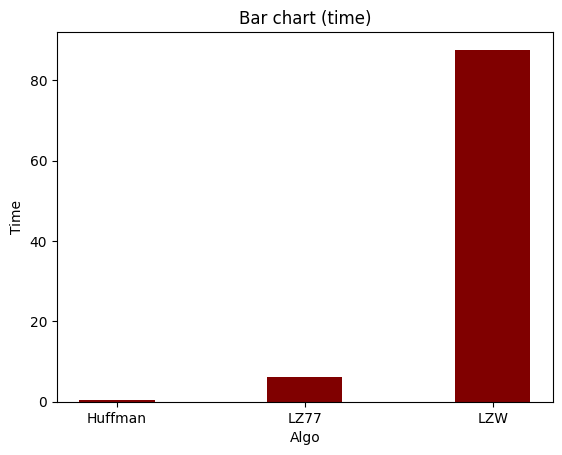

In [78]:
def graph_plotting():
    """"""
    # x-coordinates of left sides of bars
    names = ['Huffman', 'LZ77', 'LZW']
    # heights of bars
    height = [0.3306873083114624, 6.208771458128467, 87.6516856260132]
    plt.bar(names, height, color ='maroon', width = 0.4)
    plt.xlabel('Algo')
    plt.ylabel('Time')
    plt.title('Bar chart (time)')
    plt.show()
graph_plotting()

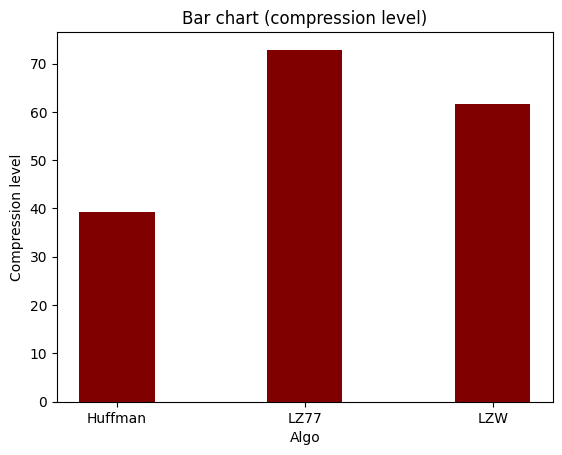

In [79]:

def graph_plotting():
    """"""
    # x-coordinates of left sides of bars
    names = ['Huffman', 'LZ77', 'LZW']
    # heights of bars
    height = [39.305085383284435, 72.85429544594424, 61.66519490349439]
    plt.bar(names, height, color ='maroon', width = 0.4)
    plt.xlabel('Algo')
    plt.ylabel('Compression level')
    plt.title('Bar chart (compression level)')
    plt.show()
graph_plotting()


Цей алгоритм працює найповільніше і опрацьовує Чорну Раду за 40 с. Майже лінійно зростає. Ступінь стиснення швидко падає зі збільшенням обʼєму повідомлення, але все одно досить високий рівень стиснення.

Висновки: Отже зі збільшенням вхідних даних ефективність стиснення впала. Через те що в цих повідомленнях було використало багато різних символів, то ефективність впала. Також це повʼязано з довгим кодом для більшості символів.

Висновок: коли краще його використовувати та за яких умов він дає кращі результати;
Алгоритм Гаффмана є найшвидшим алгоритмом з трьох. Дає досить хороші результати для коротких та середніх повідомлень з малою кількістю різних символів, які повторюються досить часто. Також має найменший ступінь стиснення для особливо великих файлів. В загальному перевага швидкість

LZ77 швидкий алгоритм, але повільніший ніж Гаффмана ймовірно через пошук повторювань. Він показує хороший час та найкращий з трьох ступінь стиску. Навіть при великому обʼємі файлу, ступінь стиснення падає незначно після певної точки. Добре працює, якщо є багато повторювань.

LZW найповільний алгоритм, через потребу створення словника. Має високий ступінь стиску файлів, але менший ніж у LZ77. Добре показує себе коли є багато повторювань.

Загальний висновок:
Вибір алгоритма залежить від типу даних, які потрібно стиснути, та бажаного ступеня стиснення. Алгоритм стиснення Гаффмана є ефективним для стискання, що містять повторювані символи або шаблони. Він дуже швидкий і ефективний для стискання невеликих та середніх файлів. Алгоритм стиснення LZ77 працює добре для даних, що містять довгі повторювані шаблони. Він може досягти дуже високих ступенів стиснення, але може бути повільнішим за інші алгоритми через необхідність пошуку повторюваних шаблонів. Алгоритм стиснення LZW працює добре для даних, що містять повторювані символи або шаблони. Він най повільніший за інші алгоритми через необхідність побудови словника під час процесу стиснення, але може досягти високих ступенів стиснення.
